# Data Cleaning
In this notebook, I lay out the steps I took to properly read the full Leiden Weibo Corpus CSV file as a pandas dataframe and clean aspects of the data which include: selecting certain columns, removing extraneous characters, removing rows that were incorrectly parsed by `pandas.read_csv`, changing data types of the corpus, and writing subsets of the data to various CSV files for future analysis.

In [12]:
# pip install snownlp

     |████████████████████████████████| 37.6 MB 6.7 MB/s eta 0:00:01    |██                              | 2.4 MB 6.5 MB/s eta 0:00:06     |███████████████████████████▋    | 32.5 MB 7.3 MB/s eta 0:00:01
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760945 sha256=4ab7b563e47e02dc88382480424c10e8de30a939c4192a57ae74dfd23c774908
  Stored in directory: /Users/hanyulun/Library/Caches/pip/wheels/09/14/c5/ea9aee34229caa97c6f6ff78c82c7f2b1a3423c1f37227b6a6
Successfully built snownlp
Note: you may need to restart the kernel to use updated packages.


In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import sys  
# sys.path.append('..')
sns.set(style="darkgrid")

In [12]:
# assign columns
col_names = ["col" + str(i) for i in range(1,10)]
# load full data set and convert csv \N to NaN in pandas dataframe
AllData1 = pd.read_csv('before.csv')
AllData2 = pd.read_csv('during.csv')
AllData3 = pd.read_csv('after.csv')

In [13]:
AllData1.微博正文 = AllData1.微博正文.str.replace("\"", "")
AllData2.微博正文 = AllData2.微博正文.str.replace("\"", "")
AllData3.微博正文 = AllData3.微博正文.str.replace("\"", "")

In [14]:
# change data type of Message from str to unicode string to preserve special characters (Chinese characters)
AllData1.微博正文 = AllData1.微博正文.astype('unicode')
AllData2.微博正文 = AllData2.微博正文.astype('unicode')
AllData3.微博正文 = AllData3.微博正文.astype('unicode')

### Adding Sentiment
I use the `SnowNLP` Python library's `str.sentiments` function to add numerical sentiment calculations (0 to 1) for each message in each data set.

In [15]:
# import necessary library
from snownlp import SnowNLP
for data in [AllData1,AllData2,AllData3]:
    dataset = data

    dataset['Sentiment'] = SnowNLP(dataset['微博正文'])
    for row in range(len(dataset)):
        dataset['Sentiment'][row] = SnowNLP(dataset['微博正文'][row]).sentiments

/var/folders/dk/23p78mwd3ljfmw62z17s_2rr0000gn/T/ipykernel_48645/2032188104.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sentiment'][row] = SnowNLP(dataset['微博正文'][row]).sentiments
/var/folders/dk/23p78mwd3ljfmw62z17s_2rr0000gn/T/ipykernel_48645/2032188104.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sentiment'][row] = SnowNLP(dataset['微博正文'][row]).sentiments
/var/folders/dk/23p78mwd3ljfmw62z17s_2rr0000gn/T/ipykernel_48645/2032188104.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

In [16]:
#Before conference
AllData1['Sentiment'].mean()

0.5627888854692117

In [17]:
#During conference
AllData2['Sentiment'].mean()

0.6071376592389067

In [18]:
#After conference
AllData3['Sentiment'].mean()

0.5829880836702218

In [19]:
AllData1['发布时间'] = pd.to_datetime(AllData1['发布时间'], infer_datetime_format=True)
AllData2['发布时间'] = pd.to_datetime(AllData2['发布时间'], infer_datetime_format=True)
AllData3['发布时间'] = pd.to_datetime(AllData3['发布时间'], infer_datetime_format=True)

In [20]:
AllData1['date'] = AllData1['发布时间'].dt.date
AllData2['date'] = AllData2['发布时间'].dt.date
AllData3['date'] = AllData3['发布时间'].dt.date

In [21]:
AllData1['date']= pd.to_datetime(AllData1.date, infer_datetime_format=True)
AllData2['date'] = pd.to_datetime(AllData2.date, infer_datetime_format=True)
AllData3['date'] = pd.to_datetime(AllData3.date, infer_datetime_format=True)

In [22]:
AllData1['heat'] =AllData1['评论数'] + AllData1['转发数']+AllData1['点赞数']
AllData2['heat'] =AllData2['评论数'] + AllData2['转发数']+AllData2['点赞数']
AllData3['heat'] =AllData3['评论数'] + AllData3['转发数']+AllData3['点赞数']

In [13]:
# pip install --upgrade numpy

In [24]:
senti_day1 = AllData1.groupby(AllData1.date).apply(lambda x: np.average(x.Sentiment, weights=x.heat))
senti_day2 = AllData2.groupby(AllData2.date).apply(lambda x: np.average(x.Sentiment, weights=x.heat))
senti_day3 = AllData3.groupby(AllData3.date).apply(lambda x: np.average(x.Sentiment, weights=x.heat))

In [28]:
print("Before conference: " , senti_day1.mean())
print("During conference: " , senti_day2.mean())
print("After conference: " , senti_day3.mean())

Before conference:  0.6675942670442935
During conference:  0.7584273600089468
After conference:  0.5946115680424586


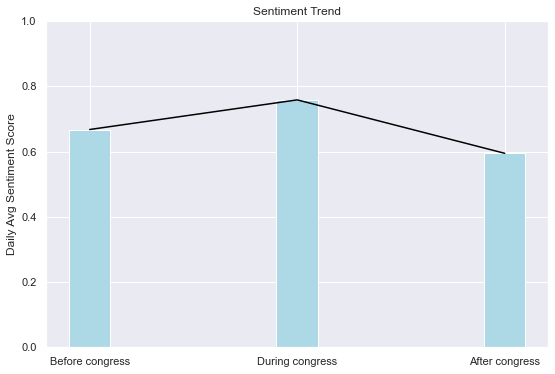

In [72]:

sentiment = [senti_day1.mean(),senti_day2.mean(),senti_day3.mean()]
fig = plt.figure(figsize = (9, 6))
 
# creating the bar plot
plt.bar(["Before congress","During congress","After congress"], sentiment, color ='lightblue',
        width = 0.2)
plt.plot(["Before congress","During congress","After congress"], sentiment, color ='black')
plt.ylim(0,1)
plt.ylabel("Daily Avg Sentiment Score")
plt.title("Sentiment Trend")
plt.savefig("senti1.png")

plt.show()


## Visualization

In [30]:
# Imports for plotting
from datetime import datetime as dt

from bokeh.plotting import figure
from bokeh.io import show, output_notebook, push_notebook
from bokeh.layouts import gridplot, row, column
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.formatters import DatetimeTickFormatter
output_notebook()

Loading BokehJS ...

In [31]:
df_senti_day1 = pd.DataFrame(senti_day1, columns=['sentiment_score1'])
df_senti_day2 = pd.DataFrame(senti_day2, columns=['sentiment_score2'])
df_senti_day3 = pd.DataFrame(senti_day3, columns=['sentiment_score3'])

In [32]:
from sklearn.linear_model import LinearRegression
from bokeh.models import Slope

x=np.arange(25)
y=df_senti_day3.sentiment_score3.to_numpy()


# determine best fit line
par = np.polyfit(x, y, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
y_predicted = [slope*i + intercept  for i in x]
y_predicted
# # plot it
# fig=figure()
# fig.circle(x,y)
# fig.line(x,y_predicted,color='red',legend='y='+str(round(slope,2))+'x+'+str(round(intercept,2)))
# show(fig)

[0.548771381397769,
 0.5525913969514932,
 0.5564114125052173,
 0.5602314280589414,
 0.5640514436126656,
 0.5678714591663897,
 0.5716914747201138,
 0.575511490273838,
 0.5793315058275621,
 0.5831515213812863,
 0.5869715369350105,
 0.5907915524887346,
 0.5946115680424587,
 0.5984315835961829,
 0.602251599149907,
 0.6060716147036311,
 0.6098916302573553,
 0.6137116458110794,
 0.6175316613648035,
 0.6213516769185277,
 0.6251716924722518,
 0.6289917080259759,
 0.6328117235797001,
 0.6366317391334242,
 0.6404517546871483]

In [33]:
from bokeh import palettes
palettes.Blues9

('#08306b',
 '#08519c',
 '#2171b5',
 '#4292c6',
 '#6baed6',
 '#9ecae1',
 '#c6dbef',
 '#deebf7',
 '#f7fbff')

In [34]:


p = figure(x_axis_type= 'datetime', width=1000, height=600, title="Sentiment Trend")

p.vbar(x=df_senti_day1.index, top=df_senti_day1.sentiment_score1, color='#fcbba1', legend_label=f'sentiment score_before', alpha=0.5, width=24*60*60*1000)
p.vbar(x=df_senti_day2.index, top=df_senti_day2.sentiment_score2, color='#c6dbef', legend_label=f'sentiment score_during', alpha=0.5, width=24*60*60*1000)
p.vbar(x=df_senti_day3.index, top=df_senti_day3.sentiment_score3, color='#c7e9c0', legend_label=f'sentiment score_after', alpha=0.5, width=24*60*60*1000)
p.line(x=[dt(2022, 9, 16), dt(2022, 10, 16)], y=[4.440892e-16, 5.376048e-01], color="red", line_width=2)
p.line(x=[dt(2022, 10, 17), dt(2022, 10, 21)], y=[0.921040, 0.587548], color="blue", line_width=2)
p.line(x=[dt(2022, 10, 22), dt(2022, 11, 22)], y=[0.173966, 0.781571], color="green", line_width=2)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [35]:


p = figure(x_axis_type= 'datetime', width=1000, height=600, title="Sentiment Trend")

p.vbar(x=df_senti_day1.index, top=df_senti_day1.sentiment_score1, color='#fcbba1', legend_label=f'sentiment score_before', alpha=0.5, width=24*60*60*1000)
p.vbar(x=df_senti_day2.index, top=df_senti_day2.sentiment_score2, color='#c6dbef', legend_label=f'sentiment score_during', alpha=0.5, width=24*60*60*1000)
p.vbar(x=df_senti_day3.index, top=df_senti_day3.sentiment_score3, color='#c7e9c0', legend_label=f'sentiment score_after', alpha=0.5, width=24*60*60*1000)
p.line(x=[dt(2022, 9, 16), dt(2022, 10, 16)], y=[0.6542100433247727, 0.680978490763814], color="red", line_width=2)
p.line(x=[dt(2022, 10, 17), dt(2022, 10, 21)], y=[0.9211367591118649, 0.5957179609060277], color="blue", line_width=2)
p.line(x=[dt(2022, 10, 22), dt(2022, 11, 22)], y=[0.5487713813977687, 0.6404517546871482], color="green", line_width=2)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [66]:
from bokeh.io import export_png

export_png(p, filename="senti2.png")

'/Users/phoebegao/Desktop/2023_winter/censorship/project/data/senti2.png'